In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split 
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
df_train = pd.read_csv('../data/train/interstellar_travel_train.csv')
df_train.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score,Tiempo Espera
0,13,1,3,0,5,7642,1.98,17.0,1,1,0,-9.009000,2022-03-14,2025-07-21,0,0,3,57.77,10.58400
1,14,1,3,0,5,58054,1.74,17.0,0,1,2,361.714815,2022-04-15,2024-07-27,1,4,4,115.00,7.20576
2,14,0,3,0,5,273,6.95,109.0,0,1,0,-127.966608,2022-07-03,2025-12-13,1,0,1,64.71,10.87776
3,24,0,0,0,5,139685,6.39,1.0,1,0,0,903.045000,2023-10-04,2025-08-15,0,0,7,105.00,5.88384
4,16,0,3,0,5,151864,1.95,10.0,2,1,0,762.738900,2023-05-11,2024-10-05,1,0,4,107.00,4.43232


In [3]:
df_test = pd.read_csv('../data/test/interstellar_travel_test.csv')
df_test.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score,Tiempo Espera
0,0,1,3,1,5,168367,10.46,62.0,2,1,0,7920.546018,2023-12-20,2024-07-04,0,0,7,102.0,1.70208
1,5,0,3,0,0,134312,0.37,26.0,2,1,0,492.119100,2022-11-16,2024-03-25,0,0,7,100.0,4.27680
2,8,1,3,0,5,42372,7.05,1.0,1,1,0,2059.630650,2023-09-08,2024-12-15,0,0,7,107.0,4.00896
3,37,0,3,0,5,50547,2.16,11.0,1,1,0,1373.790000,2024-01-19,2024-01-27,0,0,6,100.0,0.06912
4,46,1,1,0,5,58715,2.12,16.0,1,0,0,564.076590,2022-09-25,2025-01-11,0,0,7,102.0,7.24896


### Defino X_train, X_test, y_train, y_test

In [4]:
X_train = df_train[['Age', 'Destination',
       'Star System', 
       'Price (Galactic Credits)',
       'Loyalty Program Member', 'Month',
       'Tiempo Espera']]
y_train = df_train['Customer Satisfaction Score']

In [5]:
X_test = df_test[['Age', 'Destination',
       'Star System', 
       'Price (Galactic Credits)',
       'Loyalty Program Member', 'Month',
       'Tiempo Espera']]
y_test = df_test['Customer Satisfaction Score']

### MODELO 1
RandomForestRegressor

In [6]:
# from sklearn.ensemble import RandomForestRegressor

# trained_model_1 = RandomForestRegressor(n_estimators=100,
#                                         max_depth=180,
#                                         max_leaf_nodes=80,
#                                         random_state=42)
# trained_model_1.fit(X_train, y_train)

# filename = '../models/trained_model_1.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_1, archivo_salida)


In [7]:
filename = '../models/trained_model_1.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_1 = pickle.load(archivo_entrada)

trained_model_1

RandomForestRegressor(max_depth=180, max_leaf_nodes=80, random_state=42)

In [8]:

y_pred_train = trained_model_1.predict(X_train)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train, y_pred_train), 2))
print("MAE train:", round(mean_absolute_error(y_train, y_pred_train), 2))
print("MSE train:", round(mean_squared_error(y_train, y_pred_train), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2))

y_pred_test = trained_model_1.predict(X_test)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test, y_pred_test), 2))
print("MAE test:", round(mean_absolute_error(y_test, y_pred_test), 2))
print("MSE test:", round(mean_squared_error(y_test, y_pred_test), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))


RESULTADOS SOBRE TRAIN
R^2 train: 0.85
MAE train: 2.38
MSE train: 13.33
RMSE train: 3.65

RESULTADOS SOBRE TEST
R^2 test: 0.84
MAE test: 2.38
MSE test: 13.44
RMSE test: 3.67


In [9]:
pd.DataFrame({'Features':X_train.columns, 'Importance':trained_model_1.feature_importances_}).sort_values(by='Importance', ascending=False)

,Features,Importance
3,Price (Galactic Credits),0.676209
4,Loyalty Program Member,0.092533
0,Age,0.080121
5,Month,0.064505
1,Destination,0.050795
2,Star System,0.022186
6,Tiempo Espera,0.013650


### MODELO 2
RandomizedSearchCV RandomForestRegressor

In [10]:
# # Define los parámetros a probar en el RandomizedSearchCV para RandomForestRegressor
# parametros_random_forest = {
#     'n_estimators': [100,200],
#     'max_depth': [150, 200, 250],
#     'min_samples_split': randint(20, 200),
#     'min_samples_leaf': randint(20, 200),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }


# # Define y configura RandomizedSearchCV para RandomForestRegressor
# trained_model_2 = RandomizedSearchCV(RandomForestRegressor(),
#                                       parametros_random_forest,
#                                       n_iter=50,
#                                       cv=2,
#                                       scoring='r2',
#                                       n_jobs=-1,
#                                       random_state=42,
#                                       verbose=3)

# # Entrena el modelo
# trained_model_2.fit(X_train, y_train)

# # Obtiene los mejores parámetros encontrados
# print(trained_model_2.best_estimator_)
# print(trained_model_2.best_score_)
# print(trained_model_2.best_params_)

# trained_model_2 = trained_model_2.best_estimator_
# trained_model_2.fit(X_train, y_train)

# filename = '../models/trained_model_2.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_2, archivo_salida)

In [11]:
filename = '../models/trained_model_2.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_2 = pickle.load(archivo_entrada)

trained_model_2

RandomForestRegressor(bootstrap=False, max_depth=200, max_features='sqrt',
                      min_samples_leaf=28, min_samples_split=109)

In [12]:

y_pred_train = trained_model_2.predict(X_train)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train, y_pred_train), 2))
print("MAE train:", round(mean_absolute_error(y_train, y_pred_train), 2))
print("MSE train:", round(mean_squared_error(y_train, y_pred_train), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2))

y_pred_test = trained_model_2.predict(X_test)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test, y_pred_test), 2))
print("MAE test:", round(mean_absolute_error(y_test, y_pred_test), 2))
print("MSE test:", round(mean_squared_error(y_test, y_pred_test), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))


RESULTADOS SOBRE TRAIN
R^2 train: 0.87
MAE train: 2.18
MSE train: 11.41
RMSE train: 3.38

RESULTADOS SOBRE TEST
R^2 test: 0.85
MAE test: 2.32
MSE test: 12.76
RMSE test: 3.57


In [13]:
pd.DataFrame({'Features':X_train.columns, 'Importance':trained_model_2.feature_importances_}).sort_values(by='Importance', ascending=False)

,Features,Importance
3,Price (Galactic Credits),0.334275
6,Tiempo Espera,0.299791
2,Star System,0.110482
0,Age,0.079482
4,Loyalty Program Member,0.069722
5,Month,0.062512
1,Destination,0.043736


### MODELO 3
RandomizedSearchCV GradientBoostingRegressor

In [14]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import RandomizedSearchCV

# # Define el espacio de búsqueda de hiperparámetros
# param_dist = {
#     'n_estimators': [100, 500],
#     'max_depth': [10, 20],
#     'min_samples_split': [10, 20],
#     'min_samples_leaf': [10, 20],
# }

# # Crea un estimador base para el Gradient Boosting Regressor
# gbr = GradientBoostingRegressor()

# # Realiza la búsqueda aleatoria
# trained_model_3 = RandomizedSearchCV(estimator=gbr, 
#                            param_distributions=param_dist, 
#                            n_iter=50, 
#                            cv=2, 
#                            verbose=2,
#                            scoring='r2', 
#                            random_state=42, 
#                            n_jobs=-1
# )

# # Entrena la búsqueda aleatoria en tus datos de entrenamiento
# trained_model_3.fit(X_train, y_train)


# # Obtiene los mejores parámetros encontrados
# print(trained_model_3.best_estimator_)
# print(trained_model_3.best_score_)
# print(trained_model_3.best_params_)

# trained_model_3 = trained_model_3.best_estimator_
# trained_model_3.fit(X_train, y_train)

# filename = '../models/trained_model_3.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_3, archivo_salida)


In [15]:
filename = '../models/trained_model_3.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_3 = pickle.load(archivo_entrada)

trained_model_3

GradientBoostingRegressor(max_depth=10, min_samples_leaf=20,
                          min_samples_split=10)

In [16]:
y_pred_train = trained_model_3.predict(X_train)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train, y_pred_train), 2))
print("MAE train:", round(mean_absolute_error(y_train, y_pred_train), 2))
print("MSE train:", round(mean_squared_error(y_train, y_pred_train), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2))

y_pred_test = trained_model_3.predict(X_test)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test, y_pred_test), 2))
print("MAE test:", round(mean_absolute_error(y_test, y_pred_test), 2))
print("MSE test:", round(mean_squared_error(y_test, y_pred_test), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 0.88
MAE train: 2.12
MSE train: 10.45
RMSE train: 3.23

RESULTADOS SOBRE TEST
R^2 test: 0.86
MAE test: 2.25
MSE test: 12.38
RMSE test: 3.52


In [17]:
pd.DataFrame({'Features':X_train.columns, 'Importance':trained_model_3.feature_importances_}).sort_values(by='Importance', ascending=False)

,Features,Importance
3,Price (Galactic Credits),0.662947
4,Loyalty Program Member,0.088960
0,Age,0.081028
5,Month,0.062776
1,Destination,0.049494
2,Star System,0.040119
6,Tiempo Espera,0.014675


### MODELO 4
RandomizedSearchCV XGBRegresor

In [18]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# # Define los parámetros a probar en el RandomizedSearchCV para XGBoost
# parametros_xgboost = {
#                     'n_estimators': randint(100, 1000),
#                     'learning_rate': uniform(0.01, 0.3),  # Se utiliza una distribución uniforme para learning_rate
#                     'max_depth': randint(3, 15),
#                     'subsample': uniform(0.6, 0.4),  # Se utiliza una distribución uniforme para subsample
#                     'colsample_bytree': uniform(0.6, 0.4),  # Se utiliza una distribución uniforme para colsample_bytree
#                     'gamma': uniform(0, 10),  # Se utiliza una distribución uniforme para gamma
#                     'reg_alpha': uniform(0, 10),  # Se utiliza una distribución uniforme para reg_alpha
#                     'reg_lambda': uniform(0, 10)  # Se utiliza una distribución uniforme para reg_lambda
# }

# # Define y configura RandomizedSearchCV para XGBoost
# trained_model_4 = RandomizedSearchCV(XGBRegressor(),
#                                        parametros_xgboost,
#                                        n_iter=100,
#                                        cv=2,
#                                        scoring='r2',
#                                        n_jobs=-1,
#                                        random_state=42,
#                                        verbose=2)

# # Entrena el modelo
# trained_model_4.fit(X_train, y_train)

# # Obtiene los mejores parámetros encontrados
# print(trained_model_4.best_estimator_)
# print(trained_model_4.best_score_)
# print(trained_model_4.best_params_)

# final_model_4 = trained_model_4.best_estimator_
# final_model_4.fit(X_train, y_train)

# filename = '../models/trained_model_4.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_4, archivo_salida)

In [19]:
filename = '../models/trained_model_4.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_4 = pickle.load(archivo_entrada)

trained_model_4

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A2A5468D70>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A2A5B37620>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A2A5B37A40>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001A2A5B36F00>},
                   random_state=42, scoring='r2', verbose=2)

In [20]:
y_pred_train = trained_model_4.predict(X_train)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train, y_pred_train), 2))
print("MAE train:", round(mean_absolute_error(y_train, y_pred_train), 2))
print("MSE train:", round(mean_squared_error(y_train, y_pred_train), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2))

y_pred_test = trained_model_4.predict(X_test)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test, y_pred_test), 2))
print("MAE test:", round(mean_absolute_error(y_test, y_pred_test), 2))
print("MSE test:", round(mean_squared_error(y_test, y_pred_test), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 0.86
MAE train: 2.3
MSE train: 12.23
RMSE train: 3.5

RESULTADOS SOBRE TEST
R^2 test: 0.85
MAE test: 2.35
MSE test: 12.97
RMSE test: 3.6


### MODELO 5
RandomizedSearchCV KNNneighbors

In [21]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint, uniform

# # Define los parámetros a probar en el RandomizedSearchCV para KNeighborsRegressor
# parametros_knn = {
#     'n_neighbors': randint(1, 50),
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # 1 para distancia Manhattan, 2 para distancia Euclidiana
# }

# # Define y configura RandomizedSearchCV para KNeighborsRegressor
# trained_model_5 = RandomizedSearchCV(KNeighborsRegressor(),
#                                        parametros_knn,
#                                        n_iter=100,
#                                        cv=10,
#                                        scoring='r2',
#                                        n_jobs=-1,
#                                        random_state=42,
#                                        verbose=2)

# # Entrena el modelo
# trained_model_5.fit(X_train, y_train)

# # Obtiene los mejores parámetros encontrados
# print(trained_model_5.best_estimator_)
# print(trained_model_5.best_score_)
# print(trained_model_5.best_params_)

# final_model_5 = trained_model_5.best_estimator_
# final_model_5.fit(X_train, y_train)

# filename = '../models/trained_model_5.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_5, archivo_salida)

In [22]:
filename = '../models/trained_model_5.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_5 = pickle.load(archivo_entrada)

trained_model_5

RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001A2A5B34C20>,
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='r2', verbose=2)

In [23]:
y_pred_train = trained_model_5.predict(X_train)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train, y_pred_train), 2))
print("MAE train:", round(mean_absolute_error(y_train, y_pred_train), 2))
print("MSE train:", round(mean_squared_error(y_train, y_pred_train), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2))

y_pred_test = trained_model_5.predict(X_test)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test, y_pred_test), 2))
print("MAE test:", round(mean_absolute_error(y_test, y_pred_test), 2))
print("MSE test:", round(mean_squared_error(y_test, y_pred_test), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 1.0
MAE train: 0.0
MSE train: 0.0
RMSE train: 0.0

RESULTADOS SOBRE TEST
R^2 test: 0.68
MAE test: 3.72
MSE test: 27.84
RMSE test: 5.28


### MODELO 6
RandomizedSearchCV DecissionTree

In [24]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # Define el espacio de búsqueda de hiperparámetros
# param_dist = {
#     'max_depth': [10, 11, 12, 13, 14],
#     'min_samples_split': [10, 11, 12, 13, 14],
#     'min_samples_leaf': [4, 5, 6]
# }

# # Crea un estimador base para el árbol de decisión
# dt = DecisionTreeRegressor()

# # Realiza la búsqueda aleatoria
# trained_model_6 = RandomizedSearchCV(estimator=dt, 
#                                    param_distributions=param_dist, 
#                                    n_iter=100, 
#                                    cv=2, 
#                                    scoring='r2',
#                                    verbose=2, 
#                                    random_state=42, 
#                                    n_jobs=-1
# )

# # Entrena la búsqueda aleatoria en tus datos de entrenamiento
# trained_model_6.fit(X_train, y_train)


# # Obtiene los mejores parámetros encontrados
# print(trained_model_6.best_estimator_)
# print(trained_model_6.best_score_)
# print(trained_model_6.best_params_)

# trained_model_6 = trained_model_6.best_estimator_
# trained_model_6.fit(X_train, y_train)

# filename = '../models/trained_model_6.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_6, archivo_salida)

In [25]:
filename = '../models/trained_model_6.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_6 = pickle.load(archivo_entrada)

trained_model_6

DecisionTreeRegressor(max_depth=10, min_samples_leaf=6, min_samples_split=14)

In [26]:
y_pred_train = trained_model_6.predict(X_train)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train, y_pred_train), 2))
print("MAE train:", round(mean_absolute_error(y_train, y_pred_train), 2))
print("MSE train:", round(mean_squared_error(y_train, y_pred_train), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train, y_pred_train)), 2))

y_pred_test = trained_model_6.predict(X_test)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test, y_pred_test), 2))
print("MAE test:", round(mean_absolute_error(y_test, y_pred_test), 2))
print("MSE test:", round(mean_squared_error(y_test, y_pred_test), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test, y_pred_test)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 0.86
MAE train: 2.27
MSE train: 12.38
RMSE train: 3.52

RESULTADOS SOBRE TEST
R^2 test: 0.85
MAE test: 2.31
MSE test: 13.13
RMSE test: 3.62


In [27]:
pd.DataFrame({'Features':X_train.columns, 'Importance':trained_model_6.feature_importances_}).sort_values(by='Importance', ascending=False)

,Features,Importance
3,Price (Galactic Credits),0.683021
4,Loyalty Program Member,0.091300
0,Age,0.080488
5,Month,0.063895
1,Destination,0.050565
2,Star System,0.029556
6,Tiempo Espera,0.001175


# PCA

In [28]:
df = pd.read_csv('../data/processed/interstellar_travel_processed.csv')
df.head()

,Age,Gender,Occupation,Travel Class,Destination,Star System,Distance to Destination (Light-Years),Duration of Stay (Earth Days),Number of Companions,Purpose of Travel,Transportation Type,Price (Galactic Credits),Booking Date,Departure Date,Special Requests,Loyalty Program Member,Month,Customer Satisfaction Score,Tiempo Espera
0,14,1,3,0,5,127595,1.09,11.0,5,0,2,828.949275,2023-09-17,2025-01-07,0,0,7,105.0,4.12992
1,22,0,3,0,0,96086,5.70,23.0,0,1,0,488.469135,2023-03-31,2025-12-26,0,0,3,102.0,8.64864
2,62,1,1,1,0,64998,0.37,4.0,1,0,0,183.745881,2022-05-19,2025-01-04,0,4,4,100.0,8.30304
3,21,1,3,0,5,166211,0.32,23.0,1,0,2,358.754000,2023-04-13,2024-02-09,0,0,4,108.0,2.60928
4,42,0,3,1,5,99097,6.17,42.0,1,1,0,3073.759920,2023-06-12,2024-03-15,1,0,0,97.0,2.39328


In [29]:
X = df[['Age', 'Gender', 'Occupation', 
        'Travel Class', 'Destination', 'Star System', 
        'Distance to Destination (Light-Years)',
        'Duration of Stay (Earth Days)', 'Number of Companions',
        'Purpose of Travel', 'Transportation Type',
        'Price (Galactic Credits)', 'Special Requests',
        'Loyalty Program Member', 'Month',
        'Tiempo Espera']]
y = df['Customer Satisfaction Score']

In [30]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [31]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X_scaled)

In [32]:
print('Porcentaje de varianza explicada por cada componente', pca.explained_variance_ratio_)
print('\n','\n','Porcentaje de varianza explicada acumulada', pca.explained_variance_ratio_.cumsum())

Porcentaje de varianza explicada por cada componente [0.12857992 0.10857807 0.08675826 0.08511152 0.0698235  0.0649966
 0.06260742 0.06238747 0.05874887 0.05466693 0.05305116 0.05176407
 0.04123058 0.03916969 0.01773633 0.01478961]

 
 Porcentaje de varianza explicada acumulada [0.12857992 0.23715799 0.32391625 0.40902777 0.47885126 0.54384786
 0.60645528 0.66884275 0.72759163 0.78225856 0.83530972 0.88707379
 0.92830437 0.96747406 0.98521039 1.        ]


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------


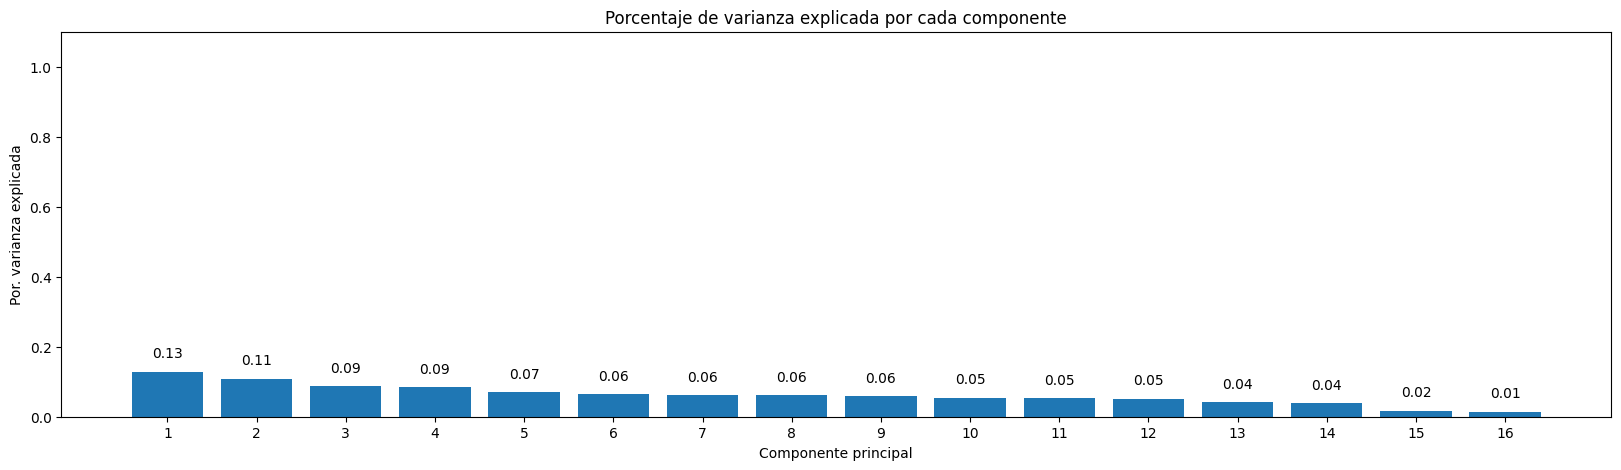

In [33]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
#### CODE ####

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X_scaled.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.12857992 0.23715799 0.32391625 0.40902777 0.47885126 0.54384786
 0.60645528 0.66884275 0.72759163 0.78225856 0.83530972 0.88707379
 0.92830437 0.96747406 0.98521039 1.        ]


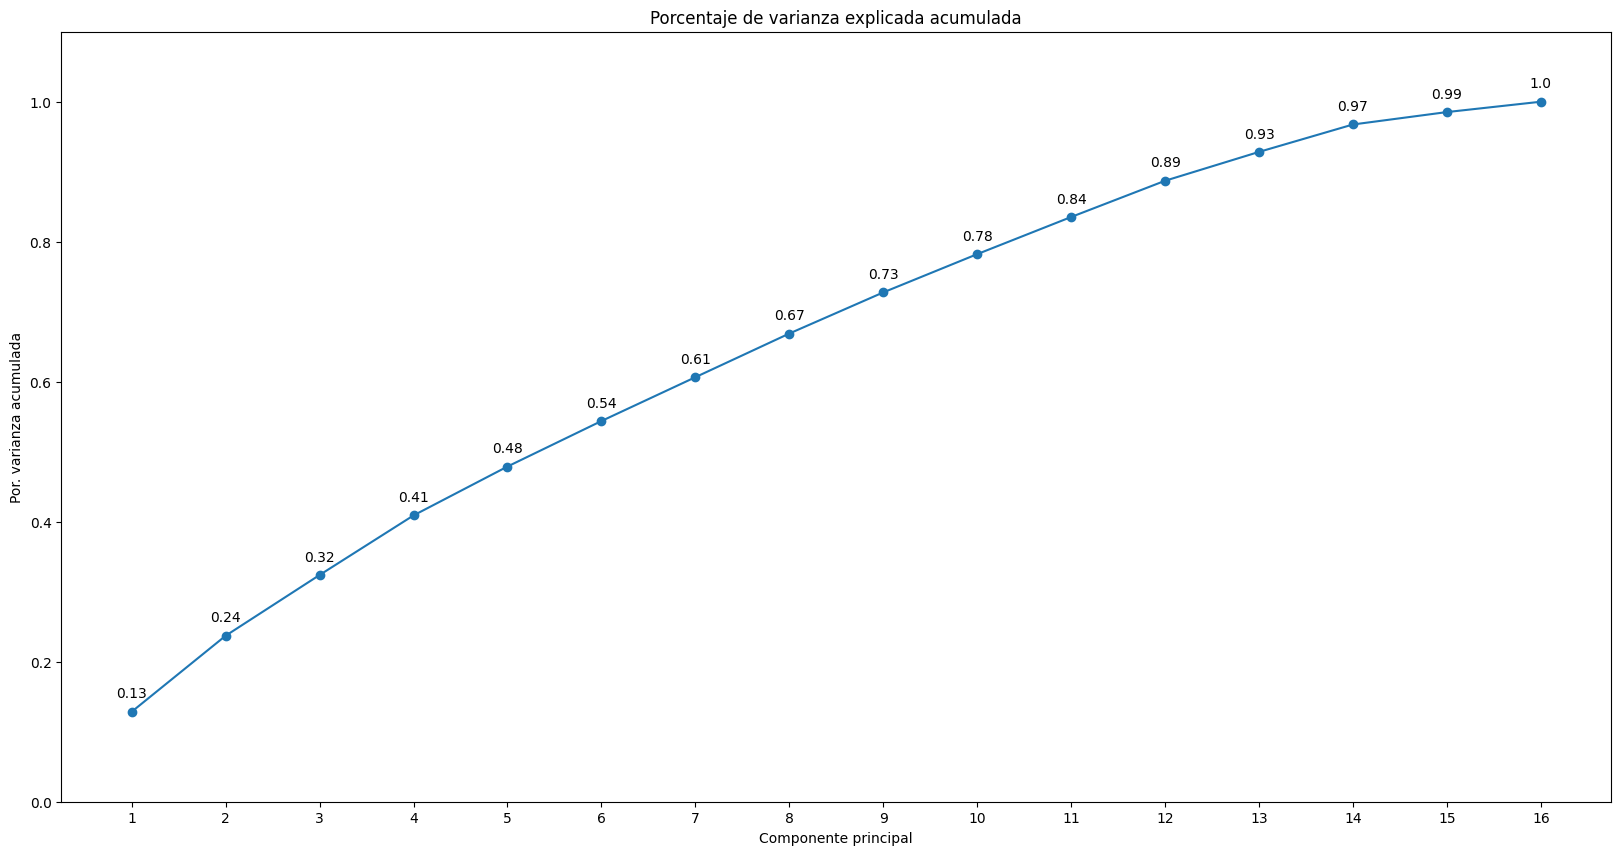

In [34]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
ax.plot(
    np.arange(len(X_scaled.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X_scaled.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

<Figure size 3000x3000 with 0 Axes>

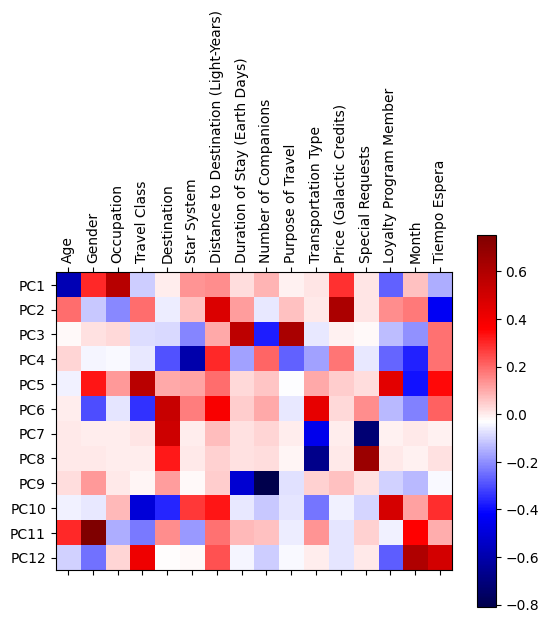

In [35]:
plt.figure(figsize=(30,30))
plt.matshow(pca.components_[:12], cmap="seismic")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11], ['PC1', "PC2",'PC3', "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12"]);
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.colorbar();

In [36]:
X_train_pca = df_train[['Age', 'Gender', 'Occupation', 
        'Travel Class', 'Destination', 'Star System', 
        'Distance to Destination (Light-Years)',
        'Duration of Stay (Earth Days)', 'Number of Companions',
        'Purpose of Travel', 'Transportation Type',
        'Price (Galactic Credits)', 'Special Requests',
        'Loyalty Program Member', 'Month',
        'Tiempo Espera']]
y_train_pca = df_train['Customer Satisfaction Score']

In [37]:
X_test_pca = df_test[['Age', 'Gender', 'Occupation', 
        'Travel Class', 'Destination', 'Star System', 
        'Distance to Destination (Light-Years)',
        'Duration of Stay (Earth Days)', 'Number of Companions',
        'Purpose of Travel', 'Transportation Type',
        'Price (Galactic Credits)', 'Special Requests',
        'Loyalty Program Member', 'Month',
        'Tiempo Espera']]
y_test_pca = df_test['Customer Satisfaction Score']

### MODELO 7
Pipeline GradientBoostingRegressor

In [38]:
# from sklearn.ensemble import GradientBoostingRegressor


# pipe_gb = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=10)),
#     ('classifier', GradientBoostingRegressor(random_state=42))
# ])

# params_gb = {
#     'scaler' : [StandardScaler(), None],
#     'classifier': [GradientBoostingRegressor(random_state=42)],
#     'classifier__max_depth': [10],
#     'classifier__min_samples_split': [20],
#     'classifier__min_samples_leaf': [20]
# }


# trained_model_7 = GridSearchCV(pipe_gb, params_gb, cv=2, scoring="r2", verbose=2, n_jobs=-1)

# # Entrena el modelo
# trained_model_7.fit(X_train_pca, y_train_pca)

# # Obtiene los mejores parámetros encontrados
# print(trained_model_7.best_estimator_)
# print(trained_model_7.best_score_)
# print(trained_model_7.best_params_)

# trained_model_7 = trained_model_7.best_estimator_
# trained_model_7.fit(X_train_pca, y_train_pca)

# filename = '../models/trained_model_7.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_7, archivo_salida)

In [39]:
filename = '../models/trained_model_7.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_7 = pickle.load(archivo_entrada)

trained_model_7

Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=10)),
                ('classifier',
                 GradientBoostingRegressor(max_depth=10, min_samples_leaf=20,
                                           min_samples_split=20,
                                           random_state=42))])

In [40]:
y_pred_train_pca = trained_model_7.predict(X_train_pca)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train_pca, y_pred_train_pca), 2))
print("MAE train:", round(mean_absolute_error(y_train_pca, y_pred_train_pca), 2))
print("MSE train:", round(mean_squared_error(y_train_pca, y_pred_train_pca), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train_pca, y_pred_train_pca)), 2))

y_pred_test_pca = trained_model_7.predict(X_test_pca)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test_pca, y_pred_test_pca), 2))
print("MAE test:", round(mean_absolute_error(y_test_pca, y_pred_test_pca), 2))
print("MSE test:", round(mean_squared_error(y_test_pca, y_pred_test_pca), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test_pca, y_pred_test_pca)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 0.89
MAE train: 2.1
MSE train: 9.89
RMSE train: 3.14

RESULTADOS SOBRE TEST
R^2 test: 0.85
MAE test: 2.32
MSE test: 12.8
RMSE test: 3.58


### MODELO 8
Pipeline RandomForestRegressor

In [41]:
# pipe_rf = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=10)),
#     ('classifier', RandomForestRegressor(random_state=42))
# ])

# params_rf = {
#     "scaler" : [StandardScaler(), None],
#     "classifier": [RandomForestRegressor(random_state=42)],
#     "classifier__max_depth": [200,250],
#     "classifier__max_features": ['sqrt','log2'],
#     "classifier__min_samples_leaf": [28,30],
#     "classifier__min_samples_split": [110,120]
# }


# trained_model_8 = GridSearchCV(pipe_rf, params_rf, cv=2, scoring="r2", verbose=2, n_jobs=-1)

# # Entrena el modelo
# trained_model_8.fit(X_train_pca, y_train_pca)

# # Obtiene los mejores parámetros encontrados
# print(trained_model_8.best_estimator_)
# print(trained_model_8.best_score_)
# print(trained_model_8.best_params_)

# trained_model_8 = trained_model_8.best_estimator_
# trained_model_8.fit(X_train_pca, y_train_pca)

# filename = '../models/trained_model_8.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_8, archivo_salida)

In [42]:
filename = '../models/trained_model_8.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_8 = pickle.load(archivo_entrada)

trained_model_8

Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=10)),
                ('classifier',
                 RandomForestRegressor(max_depth=200, max_features='sqrt',
                                       min_samples_leaf=28,
                                       min_samples_split=110,
                                       random_state=42))])

In [43]:
y_pred_train_pca = trained_model_8.predict(X_train_pca)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train_pca, y_pred_train_pca), 2))
print("MAE train:", round(mean_absolute_error(y_train_pca, y_pred_train_pca), 2))
print("MSE train:", round(mean_squared_error(y_train_pca, y_pred_train_pca), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train_pca, y_pred_train_pca)), 2))

y_pred_test_pca = trained_model_8.predict(X_test_pca)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test_pca, y_pred_test_pca), 2))
print("MAE test:", round(mean_absolute_error(y_test_pca, y_pred_test_pca), 2))
print("MSE test:", round(mean_squared_error(y_test_pca, y_pred_test_pca), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test_pca, y_pred_test_pca)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 0.85
MAE train: 2.33
MSE train: 12.79
RMSE train: 3.58

RESULTADOS SOBRE TEST
R^2 test: 0.83
MAE test: 2.46
MSE test: 14.22
RMSE test: 3.77


<!-- voy a hacer 5 modelos supervisados solo con las columnas elegidas

despues hago pca con todas las columnas

despues hago pipe con pca y mis modelos supervisados

choose the best -->

### MODELO 9
Pipeline GradientBoostingRegressor

In [44]:
# from sklearn.ensemble import GradientBoostingRegressor


# pipe_gb = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('pca', PCA(n_components=11)),
#     ('classifier', GradientBoostingRegressor(random_state=42))
# ])

# params_gb = {
#     'scaler' : [StandardScaler(), None],
#     'classifier': [GradientBoostingRegressor(random_state=42)],
#     'classifier__max_depth': [10],
#     'classifier__min_samples_split': [20],
#     'classifier__min_samples_leaf': [20]
# }


# trained_model_9 = GridSearchCV(pipe_gb, params_gb, cv=2, scoring="r2", verbose=2, n_jobs=-1)

# # Entrena el modelo
# trained_model_9.fit(X_train_pca, y_train_pca)

# # Obtiene los mejores parámetros encontrados
# print(trained_model_9.best_estimator_)
# print(trained_model_9.best_score_)
# print(trained_model_9.best_params_)

# trained_model_9 = trained_model_9.best_estimator_
# trained_model_9.fit(X_train_pca, y_train_pca)

# filename = '../models/trained_model_9.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_9, archivo_salida)

In [45]:
filename = '../models/trained_model_9.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_9 = pickle.load(archivo_entrada)

trained_model_9

Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=11)),
                ('classifier',
                 GradientBoostingRegressor(max_depth=10, min_samples_leaf=20,
                                           min_samples_split=20,
                                           random_state=42))])

In [46]:
y_pred_train_pca = trained_model_9.predict(X_train_pca)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train_pca, y_pred_train_pca), 2))
print("MAE train:", round(mean_absolute_error(y_train_pca, y_pred_train_pca), 2))
print("MSE train:", round(mean_squared_error(y_train_pca, y_pred_train_pca), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train_pca, y_pred_train_pca)), 2))

y_pred_test_pca = trained_model_9.predict(X_test_pca)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test_pca, y_pred_test_pca), 2))
print("MAE test:", round(mean_absolute_error(y_test_pca, y_pred_test_pca), 2))
print("MSE test:", round(mean_squared_error(y_test_pca, y_pred_test_pca), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test_pca, y_pred_test_pca)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 0.9
MAE train: 1.99
MSE train: 8.97
RMSE train: 3.0

RESULTADOS SOBRE TEST
R^2 test: 0.86
MAE test: 2.24
MSE test: 12.15
RMSE test: 3.49


### MODELO 10
Pipeline RandomForest y Gradient

In [47]:
# from sklearn.pipeline import Pipeline
# from sklearn.decomposition import PCA
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# # Crea el pipeline que incluye PCA y SVM

# pipeline = Pipeline(steps=[
#     ('scaler', StandardScaler()),
#     ('pca', PCA()),
#     ('classifier', GradientBoostingRegressor())
# ])

# params_gb = {
#     'scaler' : [StandardScaler(), None],
#     "pca__n_components": [10,11,12],
#     'classifier': [GradientBoostingRegressor(random_state=42)],
#     'classifier__max_depth': [5,10,20],
#     'classifier__min_samples_split': [10,20,30],
#     'classifier__min_samples_leaf': [10,20,30]
# }

# params_rf = {
#     "scaler" : [StandardScaler(), None],
#     "pca__n_components": [10,11,12],
#     "classifier": [RandomForestRegressor(random_state=42)],
#     "classifier__max_depth": [200,250],
#     "classifier__max_features": ['sqrt','log2'],
#     "classifier__min_samples_leaf": [28,30],
#     "classifier__min_samples_split": [110,120]
# }

# params = [params_gb, params_rf]

# # Realiza la búsqueda aleatoria en el pipeline
# trained_model_10 = RandomizedSearchCV(estimator=pipeline, 
#                                       param_distributions=params, 
#                                       n_iter=100, 
#                                       cv=5, 
#                                       verbose=2, 
#                                       scoring='r2',
#                                       random_state=42, 
#                                       n_jobs=-1)

# # Entrena el modelo
# trained_model_10.fit(X_train_pca, y_train_pca)

# # Obtiene los mejores parámetros encontrados
# print(trained_model_10.best_estimator_)
# print(trained_model_10.best_score_)
# print(trained_model_10.best_params_)

# trained_model_10 = trained_model_10.best_estimator_
# trained_model_10.fit(X_train_pca, y_train_pca)

# filename = '../models/trained_model_10.pkl'
# with open(filename, 'wb') as archivo_salida:
#     pickle.dump(trained_model_10, archivo_salida)


In [48]:
filename = '../models/trained_model_10.pkl'
with open(filename, "rb") as archivo_entrada:
    trained_model_10 = pickle.load(archivo_entrada)

trained_model_10

Pipeline(steps=[('scaler', None), ('pca', PCA(n_components=12)),
                ('classifier',
                 GradientBoostingRegressor(max_depth=10, min_samples_leaf=20,
                                           min_samples_split=10,
                                           random_state=42))])

In [49]:
y_pred_train_pca = trained_model_10.predict(X_train_pca)

print("RESULTADOS SOBRE TRAIN")

print("R^2 train:", round(r2_score(y_train_pca, y_pred_train_pca), 2))
print("MAE train:", round(mean_absolute_error(y_train_pca, y_pred_train_pca), 2))
print("MSE train:", round(mean_squared_error(y_train_pca, y_pred_train_pca), 2))
print("RMSE train:", round(np.sqrt(mean_squared_error(y_train_pca, y_pred_train_pca)), 2))

y_pred_test_pca = trained_model_10.predict(X_test_pca)

print("\nRESULTADOS SOBRE TEST")

print("R^2 test:", round(r2_score(y_test_pca, y_pred_test_pca), 2))
print("MAE test:", round(mean_absolute_error(y_test_pca, y_pred_test_pca), 2))
print("MSE test:", round(mean_squared_error(y_test_pca, y_pred_test_pca), 2))
print("RMSE test:", round(np.sqrt(mean_squared_error(y_test_pca, y_pred_test_pca)), 2))

RESULTADOS SOBRE TRAIN
R^2 train: 0.9
MAE train: 1.91
MSE train: 8.46
RMSE train: 2.91

RESULTADOS SOBRE TEST
R^2 test: 0.87
MAE test: 2.13
MSE test: 11.36
RMSE test: 3.37


### RESUMEN EVALUACIÓN MODELOS

In [50]:
trained_models = {}
trained_models['trained_model_1'] = trained_model_1
trained_models['trained_model_2'] = trained_model_2
trained_models['trained_model_3'] = trained_model_3
trained_models['trained_model_4'] = trained_model_4
trained_models['trained_model_5'] = trained_model_5
trained_models['trained_model_6'] = trained_model_6

trained_models_pca = {}
trained_models_pca['trained_model_7'] = trained_model_7
trained_models_pca['trained_model_8'] = trained_model_8
trained_models_pca['trained_model_9'] = trained_model_9
trained_models_pca['trained_model_10'] = trained_model_10

In [51]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Resultados de los modelos
results = []

# Iterar sobre los resultados de cada modelo
for i in range(1, 7):
    model_name = f"Modelo {i}"
    y_pred_train = trained_models[f"trained_model_{i}"].predict(X_train)
    y_pred_test = trained_models[f"trained_model_{i}"].predict(X_test)
    
    # Calcular métricas
    r2_train = round(r2_score(y_train, y_pred_train), 2)
    mae_train = round(mean_absolute_error(y_train, y_pred_train), 2)
    mse_train = round(mean_squared_error(y_train, y_pred_train), 2)
    rmse_train = round(np.sqrt(mse_train), 2)
    
    r2_test = round(r2_score(y_test, y_pred_test), 2)
    mae_test = round(mean_absolute_error(y_test, y_pred_test), 2)
    mse_test = round(mean_squared_error(y_test, y_pred_test), 2)
    rmse_test = round(np.sqrt(mse_test), 2)
    
    # Guardar resultados en una lista
    results.append([model_name, r2_train, mae_train, mse_train, rmse_train, r2_test, mae_test, mse_test, rmse_test])

# Crear DataFrame
columns = ["Modelo", "R^2 train", "MAE train", "MSE train", "RMSE train", "R^2 test", "MAE test", "MSE test", "RMSE test"]
results_df_1 = pd.DataFrame(results, columns=columns)

results_df_1


,Modelo,R^2 train,MAE train,MSE train,RMSE train,R^2 test,MAE test,MSE test,RMSE test
0,Modelo 1,0.85,2.38,13.33,3.65,0.84,2.38,13.44,3.67
1,Modelo 2,0.87,2.18,11.41,3.38,0.85,2.32,12.76,3.57
2,Modelo 3,0.88,2.12,10.45,3.23,0.86,2.25,12.38,3.52
3,Modelo 4,0.86,2.30,12.23,3.50,0.85,2.35,12.97,3.60
4,Modelo 5,1.00,0.00,0.00,0.00,0.68,3.72,27.84,5.28
5,Modelo 6,0.86,2.27,12.38,3.52,0.85,2.31,13.13,3.62


In [52]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Resultados de los modelos
results_pca = []

# Iterar sobre los resultados de cada modelo
for i in range(7, 11):
    model_name = f"Modelo {i} PCA"
    y_pred_train_pca = trained_models_pca[f"trained_model_{i}"].predict(X_train_pca)
    y_pred_test_pca = trained_models_pca[f"trained_model_{i}"].predict(X_test_pca)
    
    # Calcular métricas
    r2_train_pca = round(r2_score(y_train_pca, y_pred_train_pca), 2)
    mae_train_pca = round(mean_absolute_error(y_train_pca, y_pred_train_pca), 2)
    mse_train_pca = round(mean_squared_error(y_train_pca, y_pred_train_pca), 2)
    rmse_train_pca = round(np.sqrt(mean_squared_error(y_train_pca, y_pred_train_pca)), 2)
    
    r2_test_pca = round(r2_score(y_test_pca, y_pred_test_pca), 2)
    mae_test_pca = round(mean_absolute_error(y_test_pca, y_pred_test_pca), 2)
    mse_test_pca = round(mean_squared_error(y_test_pca, y_pred_test_pca), 2)
    rmse_test_pca = round(np.sqrt(mean_squared_error(y_test_pca, y_pred_test_pca)), 2)
    
    # Guardar resultados en una lista
    results_pca.append([model_name, r2_train_pca, mae_train_pca, mse_train_pca, rmse_train_pca, r2_test_pca, mae_test_pca, mse_test_pca, rmse_test_pca])

# Crear DataFrame
columns_pca = ["Modelo", "R^2 train", "MAE train", "MSE train", "RMSE train", "R^2 test", "MAE test", "MSE test", "RMSE test"]
results_df_pca = pd.DataFrame(results_pca, columns=columns_pca)

results_df_pca


,Modelo,R^2 train,MAE train,MSE train,RMSE train,R^2 test,MAE test,MSE test,RMSE test
0,Modelo 7 PCA,0.89,2.10,9.89,3.14,0.85,2.32,12.80,3.58
1,Modelo 8 PCA,0.85,2.33,12.79,3.58,0.83,2.46,14.22,3.77
2,Modelo 9 PCA,0.90,1.99,8.97,3.00,0.86,2.24,12.15,3.49
3,Modelo 10 PCA,0.90,1.91,8.46,2.91,0.87,2.13,11.36,3.37


In [53]:
results_df = pd.concat([results_df_1, results_df_pca], ignore_index=True)
results_df['Modelo'] = ['1_RForest', '2_RForest', '3_GBoosting', '4_XGB', '5_KNN', '6_DTree',
                        '7_PCA10_RForest', '8_PCA10_GBoosting', '9_PCA11_GBoosting', '10_PCA12_GBoosting']
results_df

,Modelo,R^2 train,MAE train,MSE train,RMSE train,R^2 test,MAE test,MSE test,RMSE test
0,1_RForest,0.85,2.38,13.33,3.65,0.84,2.38,13.44,3.67
1,2_RForest,0.87,2.18,11.41,3.38,0.85,2.32,12.76,3.57
2,3_GBoosting,0.88,2.12,10.45,3.23,0.86,2.25,12.38,3.52
3,4_XGB,0.86,2.30,12.23,3.50,0.85,2.35,12.97,3.60
4,5_KNN,1.00,0.00,0.00,0.00,0.68,3.72,27.84,5.28
5,6_DTree,0.86,2.27,12.38,3.52,0.85,2.31,13.13,3.62
6,7_PCA10_RForest,0.89,2.10,9.89,3.14,0.85,2.32,12.80,3.58
7,8_PCA10_GBoosting,0.85,2.33,12.79,3.58,0.83,2.46,14.22,3.77
8,9_PCA11_GBoosting,0.90,1.99,8.97,3.00,0.86,2.24,12.15,3.49
9,10_PCA12_GBoosting,0.90,1.91,8.46,2.91,0.87,2.13,11.36,3.37


In [57]:
pd.DataFrame(results_df.iloc[9,:])

,9
Modelo,10_PCA12_GBoosting
R^2 train,0.9
MAE train,1.91
MSE train,8.46
RMSE train,2.91
R^2 test,0.87
MAE test,2.13
MSE test,11.36
RMSE test,3.37


C:\Users\alici\AppData\Local\Temp\ipykernel_21180\3265222551.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')
C:\Users\alici\AppData\Local\Temp\ipykernel_21180\3265222551.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')
C:\Users\alici\AppData\Local\Temp\ipykernel_21180\3265222551.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')
C:\Users\alici\AppData\Local\Temp\ipykernel_21180\3265222551.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


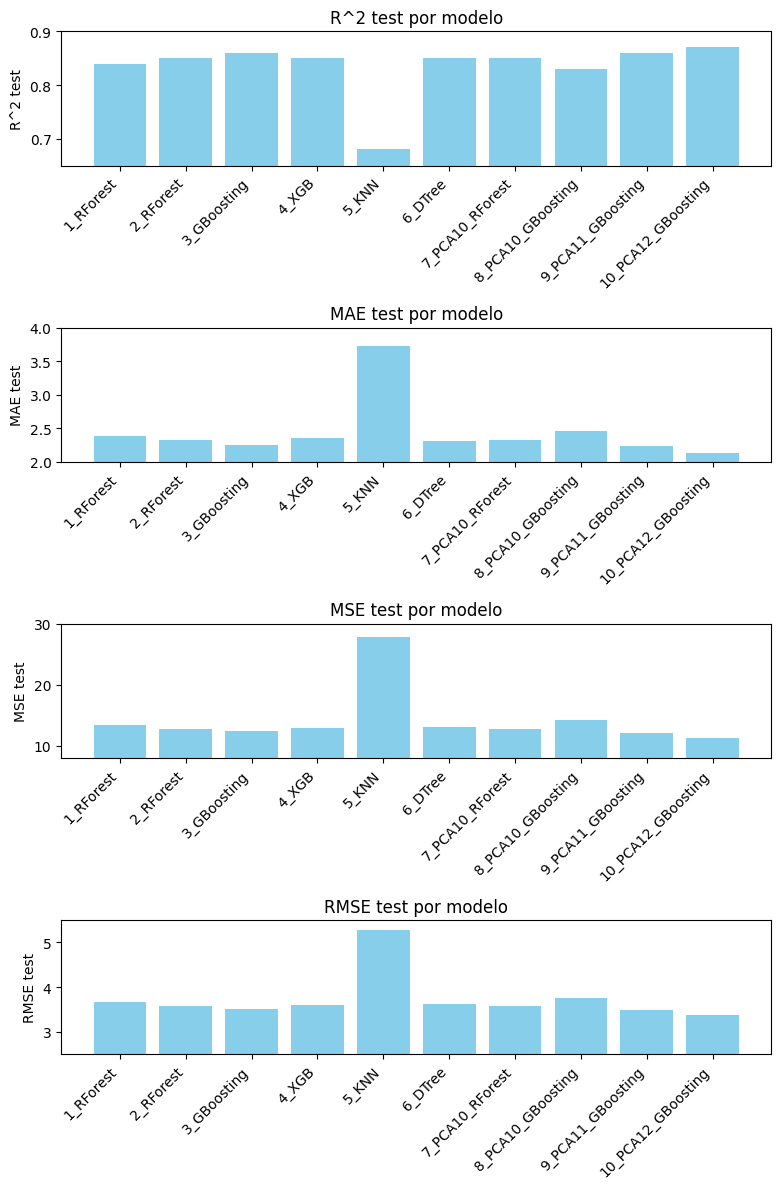

In [54]:
import matplotlib.pyplot as plt

# Crear una figura y ejes de subgráficos
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Iterar sobre las métricas y dibujar un gráfico para cada una
metrics = ['R^2 test', 'MAE test', 'MSE test', 'RMSE test']
for i, metric in enumerate(metrics):
    axs[i].bar(results_df['Modelo'], results_df[metric], color='skyblue')
    axs[i].set_ylabel(metric)
    # axs[i].set_xlabel('Modelo')
    axs[i].set_title(f'{metric} por modelo')
    axs[i].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')

    # Establecer los límites del eje y
    if i == 0:  # Solo para el primer gráfico
        axs[i].set_ylim(0.65, 0.9)  # Establecer los límites deseados
    elif i == 1:  # Solo para el primer gráfico
        axs[i].set_ylim(2, 4)  # Establecer los límites deseados
    elif i == 2:  # Solo para el primer gráfico
        axs[i].set_ylim(8, 30)  # Establecer los límites deseados
    elif i == 3:  # Solo para el primer gráfico
        axs[i].set_ylim(2.5, 5.5)  # Establecer los límites deseados
# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


C:\Users\alici\AppData\Local\Temp\ipykernel_21180\1603099595.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')
C:\Users\alici\AppData\Local\Temp\ipykernel_21180\1603099595.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')
C:\Users\alici\AppData\Local\Temp\ipykernel_21180\1603099595.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, col].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')
C:\Users\alici\AppData\Local\Temp\ipykernel_21180\1603099595.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or u

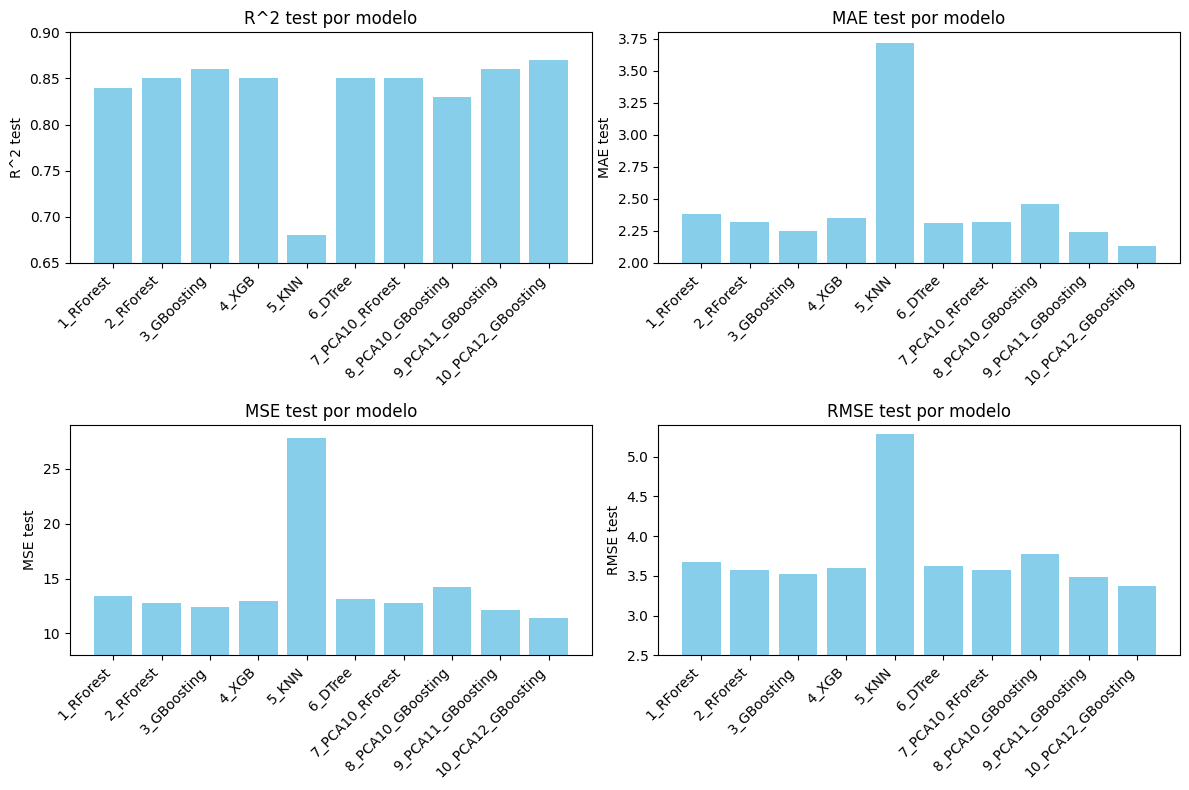

In [55]:
import matplotlib.pyplot as plt

# Crear una figura y ejes de subgráficos con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Iterar sobre las métricas y dibujar un gráfico para cada una
metrics = ['R^2 test', 'MAE test', 'MSE test', 'RMSE test']
for i, metric in enumerate(metrics):
    row = i // 2  # Obtener la fila correspondiente (0 o 1)
    col = i % 2   # Obtener la columna correspondiente (0 o 1)
    
    axs[row, col].bar(results_df['Modelo'], results_df[metric], color='skyblue')
    axs[row, col].set_ylabel(metric)
    # axs[row, col].set_xlabel('Modelo')
    axs[row, col].set_title(f'{metric} por modelo')
    axs[row, col].set_xticklabels(results_df['Modelo'], rotation=45, ha='right')

    # Establecer los límites del eje y
    if i == 0:  
        axs[row, col].set_ylim(0.65, 0.9)  # Límites para R^2 test
    elif i == 1:  
        axs[row, col].set_ylim(2, 3.8)       # Límites para MAE test
    elif i == 2:  
        axs[row, col].set_ylim(8, 29)      # Límites para MSE test
    elif i == 3:  
        axs[row, col].set_ylim(2.5, 5.4)   # Límites para RMSE test

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


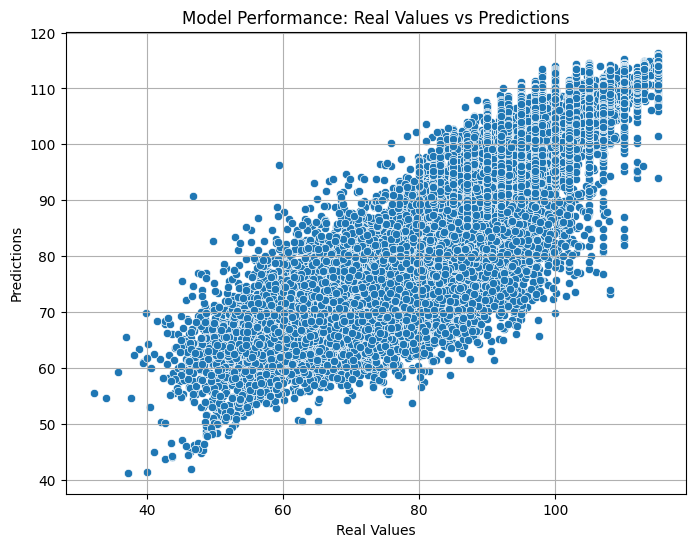

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar la predicción
prediccion = trained_model_10.predict(X_test_pca)

# Crear un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pca, y=prediccion)
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.title('Model Performance: Real Values vs Predictions')
plt.grid(True)



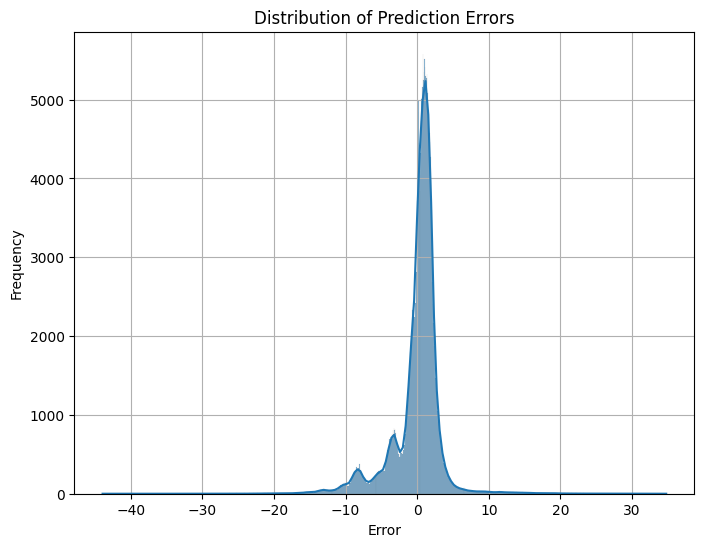

In [64]:
# Calcular los errores
errores = y_test_pca - prediccion

# Crear un histograma de los errores
plt.figure(figsize=(8, 6))
sns.histplot(errores, kde=True)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
